In [2]:
import pandas as pd

# Load your CSV data
df = pd.read_csv("\PythonPrograms\sensor_data.csv")  

# Display first few rows
print(df.head())


        Timestamp  Temperature  Humidity
0  20241003030407           18        80
1  20241003030408           18        80
2  20241003030409           25        78
3  20241003030410           33        76
4  20241003030411           37        75


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Select the feature (temperature) and target (humidity)
X = df['Temperature'].values.reshape(-1, 1)  # Independent variable
y = df['Humidity'].values  # Dependent variable

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X, y)


LinearRegression()

The data contains three columns: Timestamp, Temperature, and Humidity. The temperature and humidity values will be used for the linear regression task, where we will use temperature as the independent variable (X) and humidity as the dependent variable (Y).

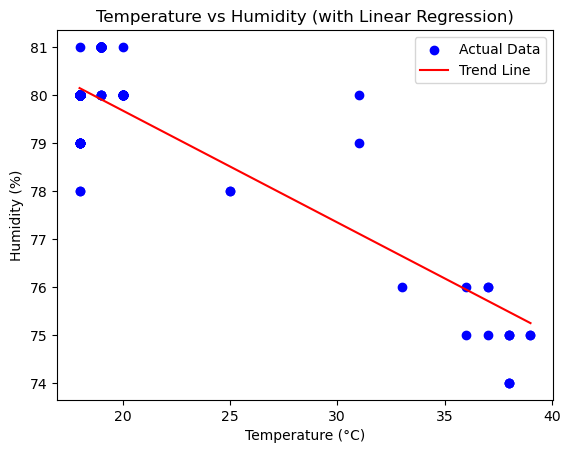

In [14]:
# Find min and max temperature
min_temp = df['Temperature'].min()
max_temp = df['Temperature'].max()

# Create 100 equally spaced temperature values
test_temperatures = np.linspace(min_temp, max_temp, 100).reshape(-1, 1)

# Predict humidity for the test temperatures
predicted_humidity = model.predict(test_temperatures)

import matplotlib.pyplot as plt

# Plot actual data
plt.scatter(df['Temperature'], df['Humidity'], color='blue', label='Actual Data')

# Plot predicted values (trend line)
plt.plot(test_temperatures, predicted_humidity, color='red', label='Trend Line')

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity (with Linear Regression)')
plt.legend()
plt.show()



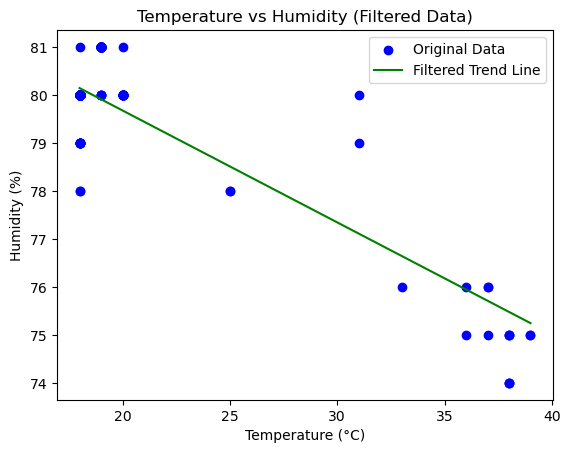

In [15]:
# Filter out samples below and above the specified thresholds
filtered_df = df[(df['Temperature'] >= min_temp) & (df['Temperature'] <= max_temp)]

# Re-train the Linear Regression model using the filtered data
X_filtered = filtered_df['Temperature'].values.reshape(-1, 1)
y_filtered = filtered_df['Humidity'].values

# Train the model
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

# Predict humidity again
predicted_humidity_filtered = model_filtered.predict(test_temperatures)

# Plot original data
plt.scatter(df['Temperature'], df['Humidity'], color='blue', label='Original Data')

# Plot trend line with outliers removed
plt.plot(test_temperatures, predicted_humidity_filtered, color='green', label='Filtered Trend Line')

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity (Filtered Data)')
plt.legend()
plt.show()



### Analysis:
Trend Line and Data Points: The trend line follows a negative slope, indicating that as temperature increases, humidity tends to decrease. This aligns with the relationship observed in the data points.
Outliers: Some points, particularly around 20°C and 35°C, deviate more significantly from the trend line. These could be considered outliers as they are farther apart from the trend line, indicating a potential variation or noise in those readings.


Filtering out a few outliers (high and low temperature readings) and re-training the model which change the slop and repeating the process further will refine the dataset and the regression model.

### Temperature Vs Humidity (Filtered Data With Linear Regression)
In the filtered dataset, the temperature and humidity readings are more tightly clustered, and the trend line still has a slight negative slope, indicating that humidity decreases as temperature increases.

### Observations:
Slight Slope Change: Compared to the initial plot, the slope of the trend line in this filtered dataset is flatter. This suggests that after removing some of the extreme outliers, the model is now learning a slightly different pattern with less drastic changes in humidity as temperature increases.

Outliers Removed: By filtering the data between temperatures of 20°C and 35°C, the variance in humidity has been reduced, leading to a more consistent pattern.

Smoother Trend: The filtered trend line seems to align better with the remaining data points, reflecting a more stable relationship between temperature and humidity.